Linear regression 을 학습하며, 기계학습의 원리 및 TensorFlow 를 익히는 notebook 입니다.

**라이브러리 Import 하기**

In [1]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


**X and Y data (given)**

In [2]:
x_train = [1, 2, 3, 4, 5, 6]
#y_train = [2, 4, 6, 8, 10] #y = 2x
#y_train = [3, 5, 7, 9, 11] #y = 2x +1
y_train = [0.7, 1.2, 1.7, 2.2, 2.7, 3.2] #y = 0.5x +0.2

signal_length = len(x_train)
y_noise = np.random.normal(0, 1, signal_length)

y_train = y_train + y_noise

# 다음의 것들도 해보시오
#y_train = [2, 4, 6] # 그냥 x_train 에 2배 곱해서 생성
#y_train = [3, 5, 7]

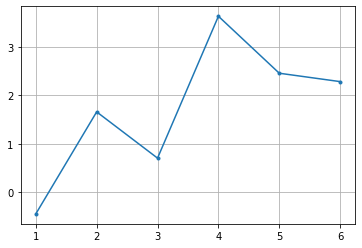

In [3]:
plt.plot(x_train, y_train, '.-')
plt.grid()

**Initialization**

In [4]:
useRandom = False

In [5]:
if useRandom:
   W = tf.Variable(tf.random_normal([1]), name='weight')
   b = tf.Variable(tf.random_normal([1]), name='bias')
else:
    w0 = 4.0;
    b0 = 2.0;

    W = tf.Variable(w0*tf.ones([1]), name='weight')
    b = tf.Variable(b0*tf.ones([1]), name='bias')

**Our hypothesis**
$$ H(x)=Wx + b $$

In [6]:
hypothesis = x_train * W + b

**cost/loss function 정의하기**
* loss of one training example : 
$$loss = \mathcal{L}(\hat{y}, y) = (\hat y^{(i)} - y^{(i)})^2 \tag{1}$$

In [7]:
loss = tf.reduce_mean(tf.square(hypothesis - y_train))

**Optimizer**

In [8]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss)


**Launch the graph in a session**

In [9]:
sess = tf.Session()

**Initializes global variables in the graph.** 

In [10]:
sess.run(tf.global_variables_initializer())

In [11]:
nb_epoch = 1001
vloss = [] #empty list
vb = [] #empty list
vw = [] #empty list

for step in range(nb_epoch):
    sess.run(train)
    loss1 = sess.run(loss)
    b1 = sess.run(b)
    w1 = sess.run(W)
    vloss.append(loss1)
    vb.append(b1)
    vw.append(w1)

    if step % 50 == 0: # 200번마다
        print(step, '\t', loss1, '\t', w1, '\t', b1)

0 	 111.59489 	 [2.7985008] 	 [1.7143048]
50 	 1.0871103 	 [0.29023865] 	 [0.89809877]
100 	 1.0172418 	 [0.33273166] 	 [0.71617764]
150 	 0.968769 	 [0.3681254] 	 [0.56465]
200 	 0.9351401 	 [0.3976059] 	 [0.43843818]
250 	 0.911809 	 [0.4221611] 	 [0.33331254]
300 	 0.89562273 	 [0.44261384] 	 [0.24575025]
350 	 0.884393 	 [0.4596496] 	 [0.17281689]
400 	 0.87660223 	 [0.47383913] 	 [0.11206856]
450 	 0.87119716 	 [0.48565808] 	 [0.06146942]
500 	 0.8674474 	 [0.49550238] 	 [0.01932388]
550 	 0.8648457 	 [0.50370204] 	 [-0.01578043]
600 	 0.86304086 	 [0.5105318] 	 [-0.04501984]
650 	 0.8617887 	 [0.51622045] 	 [-0.06937426]
700 	 0.86091995 	 [0.5209587] 	 [-0.08965974]
750 	 0.8603172 	 [0.5249054] 	 [-0.10655615]
800 	 0.85989904 	 [0.5281927] 	 [-0.12062968]
850 	 0.8596089 	 [0.5309307] 	 [-0.13235192]
900 	 0.8594077 	 [0.53321135] 	 [-0.14211571]
950 	 0.8592681 	 [0.53511095] 	 [-0.15024824]
1000 	 0.8591712 	 [0.5366932] 	 [-0.1570221]


Text(0, 0.5, 'loss')

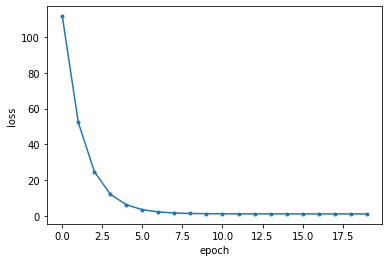

In [12]:
plt.plot(vloss[:20],'.-')
plt.xlabel('epoch')
plt.ylabel('loss')

Text(0, 0.5, 'b')

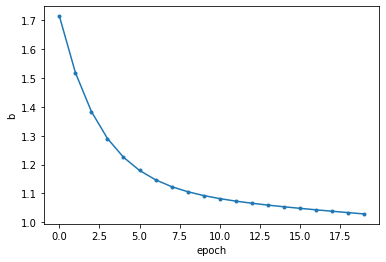

In [13]:
plt.plot(vb[:20],'.-')
plt.xlabel('epoch')
plt.ylabel('b')

Text(0, 0.5, 'W')

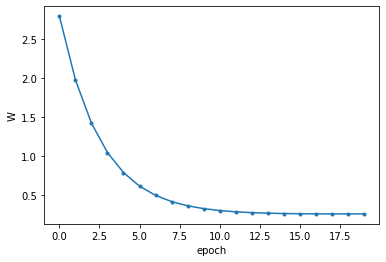

In [14]:
plt.plot(vw[:20],'.-')
plt.xlabel('epoch')
plt.ylabel('W')


**학습완료**

In [15]:
w1 = sess.run(W)[0] # 기울기
b1 = sess.run(b)[0] # bias

출력해보기

In [16]:
print(w1, b1)

0.5366932 -0.1570221


In [17]:
str1 = 'y = ' + str(w1) +'x + ' + str(b1)
print(str1)

y = 0.5366932x + -0.1570221


Text(0.5, 1.0, 'y = 0.5366932x + -0.1570221')

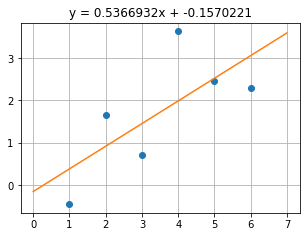

In [18]:
plt.figure(figsize=(5,3.5)) # figsize를 바꾸어보세요
plt.plot(x_train, y_train,'o') #train data 그리기

# 직선 그래프를 그리기 위한 코드
# 그래프의 x좌표를 일정 간격으로 설정함
x1 = np.linspace(np.min(x_train)-1, np.max(x_train)+1)
y1 = w1*x1 + b1
plt.plot(x1, y1)

plt.grid() # 격자
#plt.axis((np.min(x_train) - 1, np.max(x_train) + 1, np.min(y_train) - 1, np.max(y_train) + 1))
plt.title(str1)

### 스스로 해보기
#아래 부분을 수정해서 처음부터 다시 진행해보기 바랍니다. 

* 예1) 노이즈를 다르게 준다
```
x_train = [1, 2, 3]
y_train = [2+0.1, 4-0.3, 6+0.15] # 약간의 noise 추가
```
* 예2) 데이터의 갯수를 지금은 세 개의 점으로 했으나 더 늘려서도 해본다.

* 예3) 데이터의 모델을 현재는 y=2x+0 으로 해서 만들었으나, 바꾸어본다.
```
y=3x-5 
y=1.2x + 3
```

* 예4) 초기값인 w0, b0를 다르게 설정해본다.
```
w0 = 7.0;
b0 = 5.0;
```